# Example Notebook

Here's a simple test of the environment using Pandas, NumPy, Jupyter, etc., based on the [*10 Minutes to pandas*](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) tutorial.

In [2]:
import numpy as np
import pandas as pd

First, a series with a `NaN` included:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Then some dates:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Now a simple dataframe:

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.857868,0.747256,-0.569751,-0.074788
2013-01-02,-1.024871,-0.390769,0.243756,-1.117749
2013-01-03,-1.722887,1.677093,0.574838,0.473173
2013-01-04,-1.108425,-0.614358,1.213418,1.934484
2013-01-05,1.477569,-0.814777,-0.591397,-0.757493
2013-01-06,-0.272987,-1.311381,0.968111,-1.051906


## import data

Now let's import data from SoundPrint.co :

In [3]:
df = pd.read_csv("soundcheck.csv")
df.head()

,location_id,primary_category_name,top_level_category_name,city,state,postal_code,country,time_zone,avg_decibels,min_decibels,max_decibels,local_day_of_week,local_time
0,64,BBQ Joint,Restaurant,New York,NY,10010,United States,America/New_York,85.0,82.0,91.0,sat,7:05:36 PM
1,64,BBQ Joint,Restaurant,New York,NY,10010,United States,America/New_York,83.0,83.0,83.0,sat,7:25:40 PM
2,64,BBQ Joint,Restaurant,New York,NY,10010,United States,America/New_York,84.0,84.0,84.0,wed,7:54:13 PM
3,64,BBQ Joint,Restaurant,New York,NY,10010,United States,America/New_York,81.0,81.0,81.0,fri,8:03:23 PM
4,64,BBQ Joint,Restaurant,New York,NY,10010,United States,America/New_York,90.0,84.0,104.0,sat,8:11:42 PM


In [6]:
df.shape

(11658, 13)

Notes from Greg Scott @ SoundPrint:

There are ~11,700 SoundChecks of NYC Restaurants in this file organized as follows: 

For Columns:

 - *Venue ID* -- developer insisted on making the venue names anonymous, but we can retrieve a specific venue name should you wish; same venue ID means more than one soundcheck was taken for such venue - makes for more robust data)

 - *Restaurant Type* -- could be interesting segmented data analysis

 - *Zip code* -- could be good for seeing sound levels by Manhattan neighborhoods
 
 - for the *Avg*, *Min*, *Max* sound levels: Avg is what most people care about, but those with _Hyperacusis_ - sensitivity to loud or sudden bursts of noise - care about Max

 - *Day of the week* -- could be some interested day of the week trends for sound levels (are places louder during weekend days)?

 - *Timestamp* -- sound levels by time of day could also be useful.

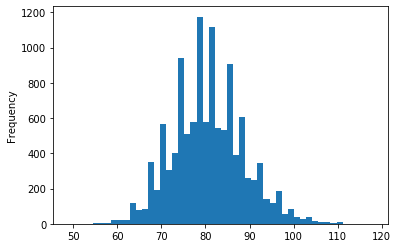

In [4]:
%matplotlib inline

d2 = df["max_decibels"]
ax = d2.plot.hist(bins=50)

Huh. What's weird about the data in that visualization?